In [4]:
paths_to_results = [ # baselines (if compare)
    "../../../results/temperature_experiment/lcb_sc2_15b_generator_temp0.6.json.gz",
    "../../../results/temperature_experiment/lcb_sc2_15b_generator_temp0.7.json.gz",
    "../../../results/temperature_experiment/lcb_sc2_15b_generator_temp0.8.json.gz",
    "../../../results/temperature_experiment/lcb_sc2_15b_generator_temp0.9.json.gz",
    "../../../results/temperature_experiment/lcb_sc2_15b_generator_temp1.0.json.gz",
]
compare = []

In [5]:
from pathlib import Path
for p in paths_to_results:
    assert Path(p).exists(), f"Path {p} doesn't exist!"

In [6]:
from codeprm.eval.metrics import get_pass_ks
from codeprm.utils import gunzip_json_read
import numpy as np

all_pass_ks = {}
for r in (paths_to_results + compare):
    print(f"Reading", r)
    items = gunzip_json_read(r)["items"]
    upper_k = len(items[0]["results"])
    pass_ks = {}
    for k in range(1, upper_k+1):
        pass_ks[k] = np.mean(get_pass_ks(items, k))
    all_pass_ks[r] = pass_ks

Reading ../../../results/temperature_experiment/lcb_sc2_15b_generator_temp0.6.json.gz
Reading ../../../results/temperature_experiment/lcb_sc2_15b_generator_temp0.7.json.gz
Reading ../../../results/temperature_experiment/lcb_sc2_15b_generator_temp0.8.json.gz
Reading ../../../results/temperature_experiment/lcb_sc2_15b_generator_temp0.9.json.gz
Reading ../../../results/temperature_experiment/lcb_sc2_15b_generator_temp1.0.json.gz


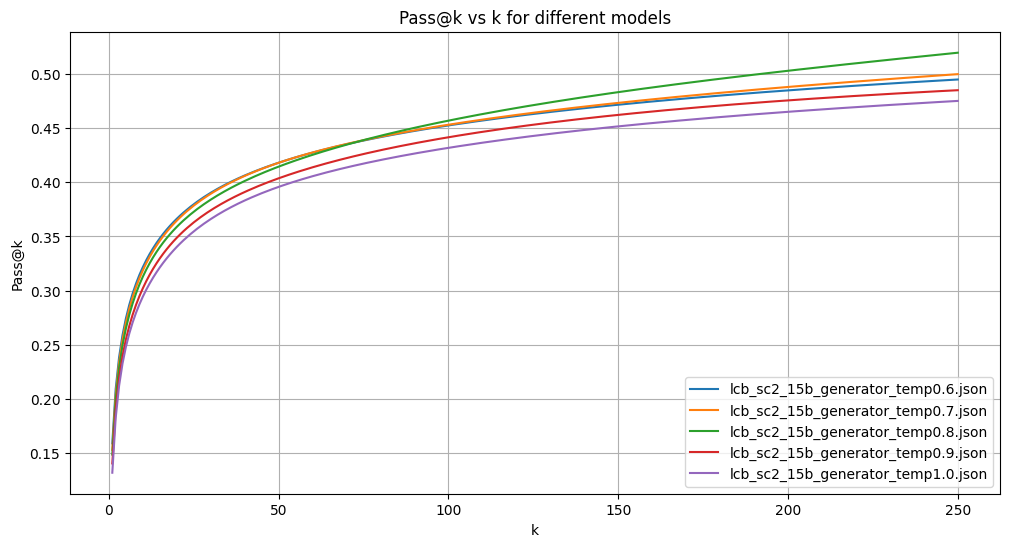

In [7]:
import matplotlib.pyplot as plt
from pathlib import Path
plt.figure(figsize=(12, 6))
for label, values in all_pass_ks.items():
    ks = list(values.keys())
    pass_at_k = list(values.values())
    linestyle = '--' if any(p in label for p in paths_to_results) and len(compare) > 0 else '-'
    plt.plot(ks, pass_at_k, label=Path(label).stem, linestyle=linestyle)

plt.xlabel('k')
plt.ylabel('Pass@k')
plt.title('Pass@k vs k for different models')
plt.legend()
plt.grid(True)
plt.show()